## Title: Data augmentation
## Author: Tengku Muhammad Hanis Mokhtar
## Date: May16, 2024

* Visualise the augmented image

## Load the required packages

In [1]:
library(keras)
library(tfdatasets)

## Load an image from our data

In [2]:
# Load an image
img_skin <- 
  image_load("../input/skin-cancer/Data/train/benign/1732.jpg")

# Change the format that accessible by keras
img_skin_reshaped <- 
  img_skin %>% 
  image_to_array() %>% 
  array_reshape(c(1, dim(.)))

# Format for both images
img_skin$size
dim(img_skin_reshaped)

[[1]]
[1] 224

[[2]]
[1] 224

[1]   1 224 224   3

## Define the layer for data augmentation

* layer_random_flip("horizontal") — applies horizontal flip randomly to a 50% of the images that go through it
* layer_random_rotation(0.1) — rotates the image by a random value in the range [-10%, +10%] (these are fractions of a full circle—in degrees, the range would be [-36 degrees, +36 degrees])
* layer_random_zoom(0.2) — zooms in or out of the image by a random factor in the range [-20%, +20%]

In [3]:
data_augmentation <- keras_model_sequential() %>%
  layer_random_flip("horizontal") %>%
  layer_random_rotation(0.1) %>%
  layer_random_zoom(0.2)

## Plot the image

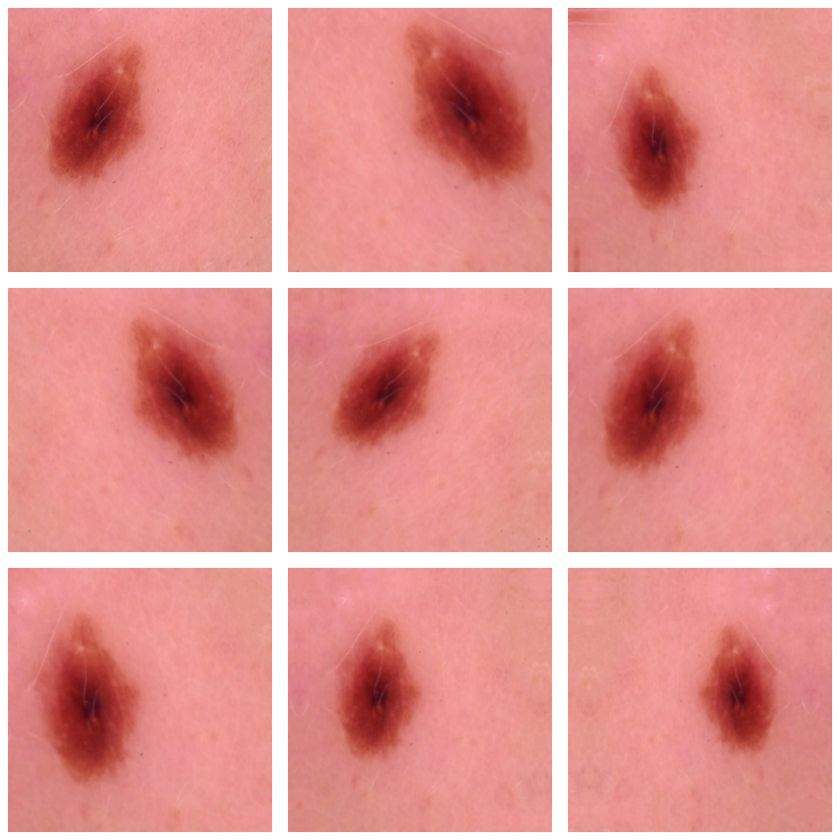

In [4]:
# Set up the plot 
par(mfrow = c(3, 3), mar = rep(.5, 4))

# Plot the original image 
image <- img_skin_reshaped[1, , , ]
plot(as.raster(as.array(image), max = 255))

# Plot the augmented image using a loop
for (i in 2:9) {
  augmented_images <- data_augmentation(img_skin_reshaped)
  augmented_image <- augmented_images[1, , , ]
  plot(as.raster(as.array(augmented_image), max = 255))
}
